# 5
The following reaction was studied in a laboratory batch reactor:
$$A\to2B$$
The initial concentration of A was 2 mol/l and the initial concentration of B was 1 mol/l (for all the experiments). You can assume that the volume of the reaction does not change. Three reactor runs were performed at temperatures of 25°C, 35°C and 45°C (temperature stayed constant throughout the run). The following results were obtained:

|Time (minutes)|Conc of B (mol/l) 25°C|Conc of B (mol/l) 35°C|Conc of B (mol/l) 45°C|
|---|---|---|---|
|0.00|1.00|1.00|1.00|
|1.00|1.85|2.20|2.61|
|2.00|2.53|3.04|3.57|
|3.00|3.05|3.63|4.15|
|4.00|3.47|4.04|4.49|
|6.00|4.05|4.53|4.82|
|10.00|4.64|4.89|4.98|
|200|5|5|5|

Is the reaction reversible or not? How long will it take to achieve a 50% conversion of A, if the same reactor is operated at 75°C and when we start with 4 mol/l of A and no B. [0.5 min, E=30kJ/mol]

In [1]:
# batch reactor and constant volume
# @200mins all are at 5mol (2 mol A to 4 mol B + 1 mol B present)
# therefore conversion is 100% at 200 mins
# T is held constant during each run
# endothermic

Is the reaction reversible or not?

In [2]:
# irreversible because it goes to completion

How long will it take to achieve a 50% conversion of A, if the same reactor is operated at 75°C and when we start with 4 mol/l of A and no B. [0.5 min, E=30kJ/mol]

In [12]:
CAo = 2 #mol/L
CBo = 1 #mol/L
V =1 # L chosen as a basis
NAo = CAo*V
NBo = CBo*V


In [19]:
from numpy import log, array, exp, linspace
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
R = 8.314 #J/kmol.K

In [54]:
from numpy import array
from matplotlib import pyplot as plt
%matplotlib inline
Data = array([[0.0, 1.0, 1.0, 1.0],
                 [1.0, 1.85, 2.20, 2.61],
                 [2.0, 2.53, 3.04, 3.57],
                 [3.0, 3.05, 3.63, 4.15],
                 [4.0, 3.47, 4.04, 4.49],
                 [6.0, 4.05, 4.53, 4.82],
                 [10.0,4.64, 4.89, 4.98]])
t = Data[:, 0]
NB25 = Data[:, 1]
NB35 = Data[:, 2]
NB45 = Data[:, 3]


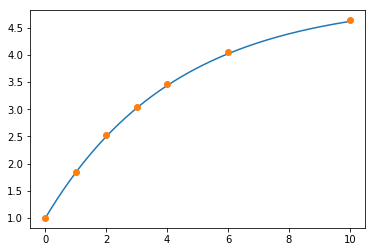

In [43]:
k25 = 0.235# L/mol.min
n = 1
def ri(var):
    NA, NB = var
    
    rA = -k25*(NA/V)*n
    rB = -2*rA
        
    return [rA, rB]

def diffs(var, t):
    NA, NB = var
    [rA, rB] = ri(var)
    
    dNAdt = rA*V
    dNBdt = rB*V
         
    return [dNAdt, dNBdt]
tspan = linspace(0, 10, 1000)
var = odeint(diffs, [NAo, NBo], tspan)
    
plt.plot(tspan, var[:,1],'-',t,NB25,'o')

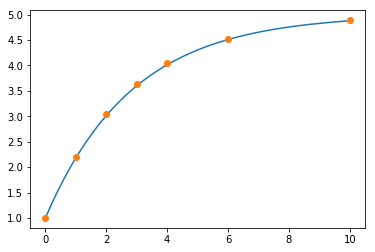

In [47]:
k35 = 0.35# L/mol.min
n = 1
def ri(var):
    NA, NB = var
    
    rA = -k35*(NA/V)*n
    rB = -2*rA
        
    return [rA, rB]

def diffs(var, t):
    NA, NB = var
    [rA, rB] = ri(var)
    
    dNAdt = rA*V
    dNBdt = rB*V
         
    return [dNAdt, dNBdt]
tspan = linspace(0, 10, 1000)
var = odeint(diffs, [NAo, NBo], tspan)
    
plt.plot(tspan, var[:,1],'-',t,NB35,'o')

0.5


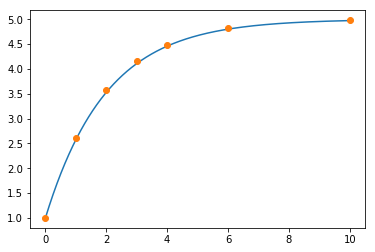

In [53]:
k45 = 0.5# L/mol.min
n = 1
def ri(var):
    NA, NB = var
    
    rA = -k45*(NA/V)*n
    rB = -2*rA
        
    return [rA, rB]

def diffs(var, t):
    NA, NB = var
    [rA, rB] = ri(var)
    
    dNAdt = rA*V
    dNBdt = rB*V
         
    return [dNAdt, dNBdt]
tspan = linspace(0, 10, 1000)
var = odeint(diffs, [NAo, NBo], tspan)
    
plt.plot(tspan, var[:,1],'-',t,NB45,'o')
print (k45)

In [57]:
print ('k25=',k25, 'k35=',k35 ,'k45=', k45)

k25= 0.235 k35= 0.35 k45= 0.5


ko= 38873.7160906 1/s, EA= 29779.2323078 J/mol, r^2= 0.999827832088


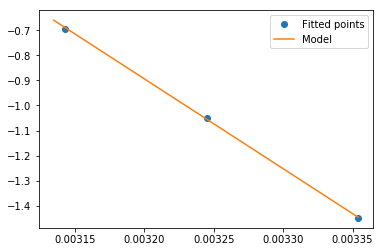

In [59]:
k = array([k25, k35, k45])
T = array([298.15, 308.15, 318.15])

lnk = log(k)

slope, intercept, r_value, p_value, std_err = linregress(1/T, lnk)

ko = exp(intercept)
EA = -slope*8.314
print('ko=', ko, '1/s,', 'EA=', EA, 'J/mol,', 'r^2=', r_value**2)

Tspan = linspace(298.15, 319)
k = ko*exp(-EA/(8.314*Tspan))

plt.plot(1/T, lnk, 'o', 1/Tspan, log(k))
plt.legend(['Fitted points', 'Model'])

In [60]:
k75 = ko*exp(-EA/(8.314*348.15))
k75

1.3230353273060118

In [61]:
CAo1 = 4 
CBo1 = 0
NAo1 = CAo1*V
NBo1 = CBo1*V

In [62]:
# dNAdt = rA*V = -k75*CA*V = -k75*NA
# ln(NA/NAo) = -k75*t

In [63]:
t75 = -log(0.5)/k75
t75 #mins

0.5239067818176435